In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

In [2]:
df = pd.read_csv('../Features/Data 2/Train/combined_data.csv')
df.head()

,SampleName,label,A,C,D,E,F,G,H,I,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
0,IKDNFIRF,1,0.000000,0.000000,0.125,0.000000,0.250000,0.000000,0.000000,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,QERRAMGFVGMR,1,0.083333,0.000000,0.000,0.083333,0.083333,0.166667,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,APVSTGAGGGTVLAKMYPRGSHWAVGHLM,1,0.137931,0.000000,0.000,0.000000,0.000000,0.206897,0.068966,0.00,...,0.0,0.0,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,MRCYFLTGLAKLQS,0,0.071429,0.071429,0.000,0.000000,0.071429,0.071429,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,SYSMEHFRWGKPVGRKRRPVKVYTSNGVEEESAEVFPGEM,1,0.025000,0.000000,0.000,0.150000,0.050000,0.100000,0.025000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0


In [3]:
df.shape

(13188, 1017)

In [4]:
# Checking for duplicate rows
df.duplicated().sum()

5185

In [5]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(8003, 1017)

In [7]:
df['label'].value_counts()

label
0    4019
1    3984
Name: count, dtype: int64

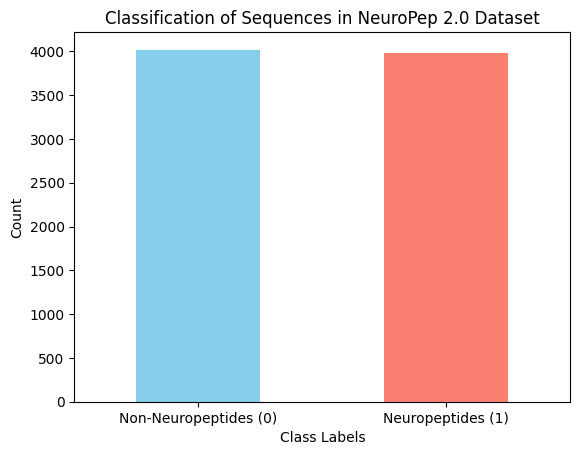

In [8]:
import matplotlib.pyplot as plt

# Plotting the value counts for the 'label' column
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding a title and labels
plt.title('Classification of Sequences in NeuroPep 2.0 Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# Setting custom x-axis tick labels with horizontal orientation
plt.xticks(ticks=[0, 1], labels=['Non-Neuropeptides (0)', 'Neuropeptides (1)'], rotation=0)

# Show the plot
plt.show()

In [9]:
# Checking for missing values
df.isnull().sum()

SampleName    0
label         0
A             0
C             0
D             0
             ..
YS_DPC        0
YT_DPC        0
YV_DPC        0
YW_DPC        0
YY_DPC        0
Length: 1017, dtype: int64

In [10]:
# print the columns with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [11]:
# checking column distribution
df.describe()

,label,A,C,D,E,F,G,H,I,K,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
count,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,...,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000
mean,0.497813,0.064818,0.025003,0.044479,0.046122,0.061330,0.079256,0.022497,0.044674,0.048706,...,0.000631,0.001513,0.001827,0.001086,0.001501,0.003480,0.001256,0.001515,0.000450,0.001107
std,0.500026,0.068911,0.051578,0.056373,0.061856,0.068261,0.081311,0.040355,0.056081,0.061798,...,0.007458,0.010818,0.012032,0.008145,0.009970,0.017567,0.009220,0.010250,0.005369,0.009267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.055556,0.000000,0.025641,0.020202,0.050000,0.064516,0.000000,0.025641,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.104957,0.022727,0.076923,0.076923,0.100000,0.116279,0.035191,0.076923,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.571429,0.400000,0.500000,0.583333,0.750000,0.833333,0.444444,0.375000,0.611111,...,0.200000,0.200000,0.200000,0.142857,0.166667,0.200000,0.222222,0.200000,0.142857,0.222222


In [12]:
# print the data types
df.dtypes

SampleName     object
label           int64
A             float64
C             float64
D             float64
               ...   
YS_DPC        float64
YT_DPC        float64
YV_DPC        float64
YW_DPC        float64
YY_DPC        float64
Length: 1017, dtype: object

# Feature Selection

In [32]:
df_1 = df.copy()

# Dropping the 'SampleName' column
df_1.drop('SampleName', axis=1, inplace=True)
df_1

,label,A,C,D,E,F,G,H,I,K,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
0,1,0.000000,0.000000,0.125000,0.000000,0.250000,0.000000,0.000000,0.250000,0.125000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1,0.083333,0.000000,0.000000,0.083333,0.083333,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,1,0.137931,0.000000,0.000000,0.000000,0.000000,0.206897,0.068966,0.000000,0.034483,...,0.000000,0.000000,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0,0.071429,0.071429,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,1,0.025000,0.000000,0.000000,0.150000,0.050000,0.100000,0.025000,0.000000,0.075000,...,0.000000,0.000000,0.000000,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13183,0,0.157895,0.000000,0.052632,0.052632,0.052632,0.105263,0.052632,0.052632,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
13184,1,0.000000,0.000000,0.000000,0.000000,0.250000,0.375000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
13185,1,0.038462,0.153846,0.115385,0.038462,0.000000,0.115385,0.000000,0.038462,0.038462,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
13186,0,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
# Compute the correlation matrix
correlation_matrix = df_1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
X = df_1.drop(['label'], axis=1)
y = df_1['label']

In [35]:
# n neighbours 3,4,5 comparison

mutual_info = mutual_info_classif(X, y)
feature_scores = pd.Series(mutual_info, index=X.columns)
feature_scores.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance using Mutual Information')
plt.show()

In [ ]:
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)
chi2_scores.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance using Chi-Squared Test')
plt.show()

In [ ]:
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
feature_ranking.sort_values().plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance using RFE')
plt.show()

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef[lasso_coef != 0].sort_values().plot(kind='barh', figsize=(12, 6))
plt.title('Feature Importance using Lasso')
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

# Model Building

In [17]:
X = df.drop(['SampleName','label'], axis=1)
y = df['label']


# standardising the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [76]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [77]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)

In [80]:
print('Accuracy:', accuracy_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1 Score:', f1_lr)
print('ROC AUC Score:', roc_auc_lr)

Accuracy: 0.8813241723922548
Precision: 0.8773466833541927
Recall: 0.8839848675914249
F1 Score: 0.8806532663316582
ROC AUC Score: 0.8813488694392767


In [81]:
classificationReport_lr = classification_report(y_test, y_pred)
print(classificationReport_lr)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       808
           1       0.88      0.88      0.88       793

    accuracy                           0.88      1601
   macro avg       0.88      0.88      0.88      1601
weighted avg       0.88      0.88      0.88      1601



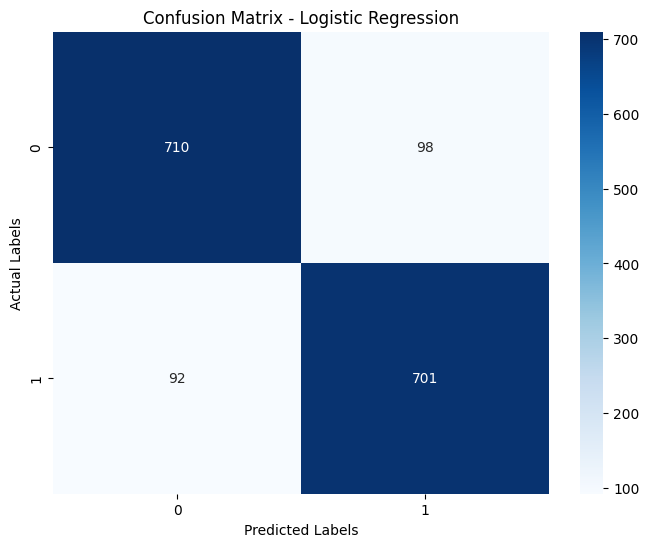

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# SVM

In [83]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [84]:
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)

In [85]:
print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_svm)
print('ROC AUC Score:', roc_auc_svm)

Accuracy: 0.8969394128669581
Precision: 0.8738095238095238
Recall: 0.9255989911727617
F1 Score: 0.8989589712186161
ROC AUC Score: 0.8972054361804402


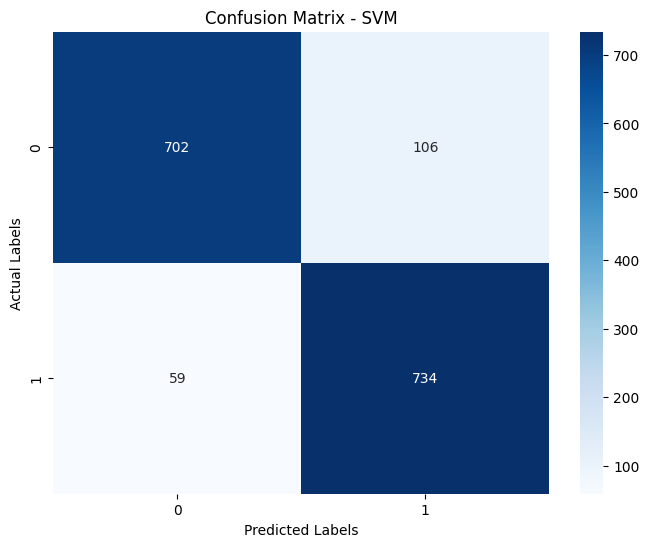

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# KNN

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [88]:
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)

In [89]:
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1 Score:', f1_knn)
print('ROC AUC Score:', roc_auc_knn)

Accuracy: 0.8169893816364772
Precision: 0.7741228070175439
Recall: 0.8902900378310215
F1 Score: 0.8281524926686218
ROC AUC Score: 0.8176697713907582


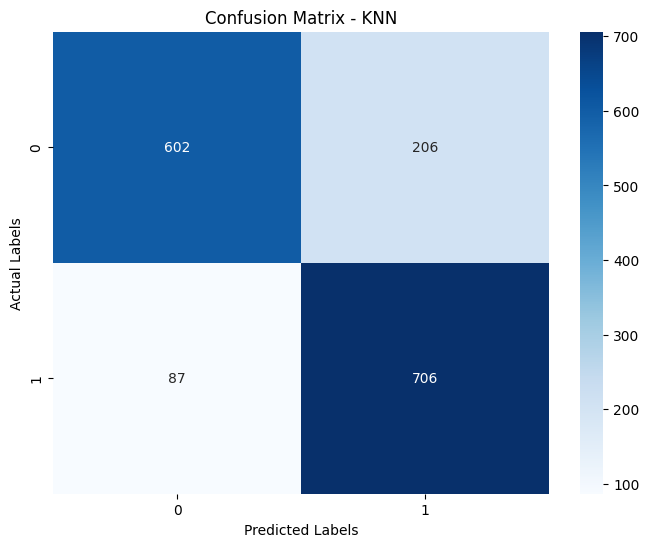

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - KNN')
plt.show()

# Naive Bayes

In [91]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [92]:
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
roc_auc_nb = roc_auc_score(y_test, y_pred)
conf_matrix_nb = confusion_matrix(y_test, y_pred)

In [93]:
print('Accuracy:', accuracy_nb)
print('Precision:', precision_nb)
print('Recall:', recall_nb)
print('F1 Score:', f1_nb)
print('ROC AUC Score:', roc_auc_nb)

Accuracy: 0.7626483447845097
Precision: 0.8143074581430746
Recall: 0.6746532156368222
F1 Score: 0.7379310344827588
ROC AUC Score: 0.7618315583134607


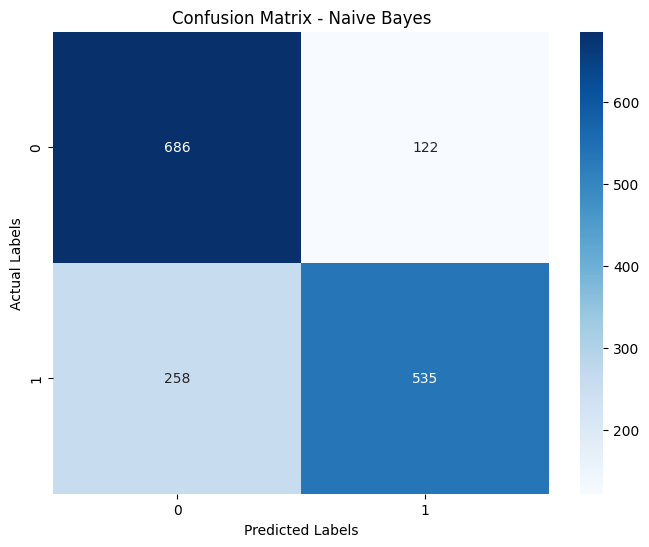

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Decision Tree

In [95]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [96]:
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)

In [97]:
print('Accuracy:', accuracy_dt)
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1 Score:', f1_dt)
print('ROC AUC Score:', roc_auc_dt)

Accuracy: 0.8363522798251093
Precision: 0.8306351183063512
Recall: 0.8411097099621689
F1 Score: 0.8358395989974937
ROC AUC Score: 0.8363964391395002


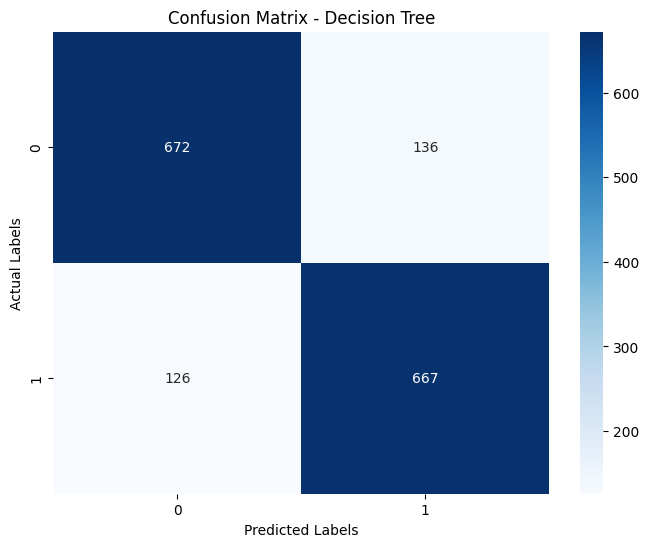

In [98]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Random Forest

In [99]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [100]:
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)

In [101]:
print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)
print('ROC AUC Score:', roc_auc_rf)

Accuracy: 0.8950655840099938
Precision: 0.861271676300578
Recall: 0.9394703656998739
F1 Score: 0.8986731001206272
ROC AUC Score: 0.8954777571073627


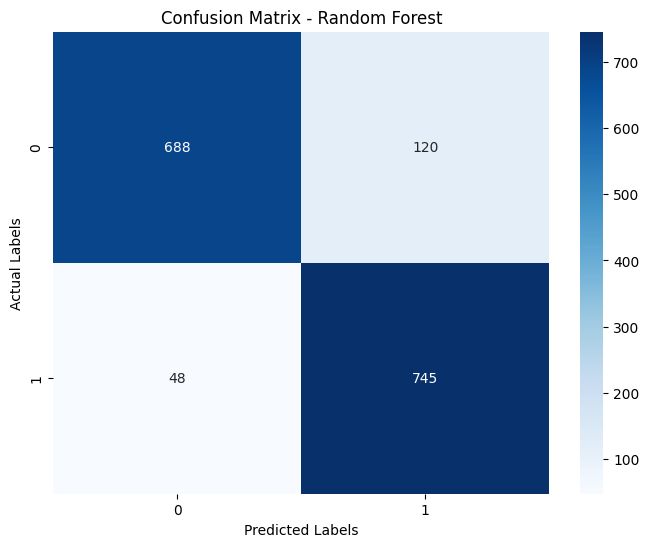

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# XGBoost

In [103]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [104]:
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)

In [105]:
print('Accuracy:', accuracy_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1 Score:', f1_xgb)
print('ROC AUC Score:', roc_auc_xgb)

Accuracy: 0.9144284821986258
Precision: 0.9
Recall: 0.9306431273644389
F1 Score: 0.9150650960942344
ROC AUC Score: 0.9145789894247937


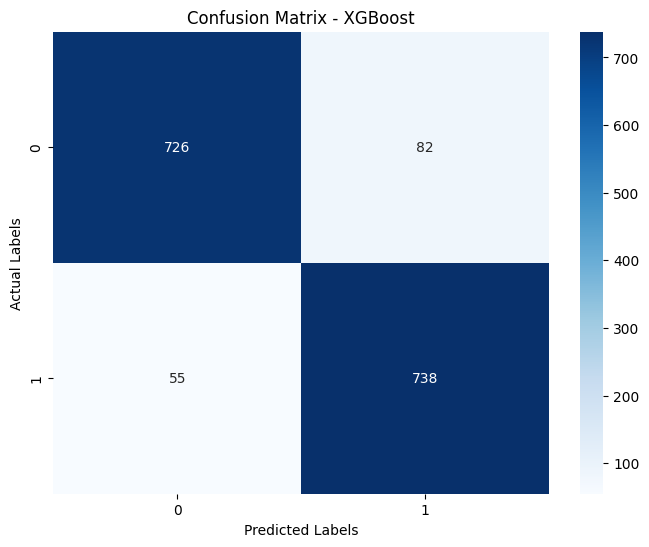

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# CatBoost

In [107]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

In [108]:
accuracy_cat = accuracy_score(y_test, y_pred)
precision_cat = precision_score(y_test, y_pred)
recall_cat = recall_score(y_test, y_pred)
f1_cat = f1_score(y_test, y_pred)
roc_auc_cat = roc_auc_score(y_test, y_pred)
conf_matrix_cat = confusion_matrix(y_test, y_pred)

In [109]:
print('Accuracy:', accuracy_cat)
print('Precision:', precision_cat)
print('Recall:', recall_cat)
print('F1 Score:', f1_cat)
print('ROC AUC Score:', roc_auc_cat)

Accuracy: 0.9106808244846971
Precision: 0.892512077294686
Recall: 0.9319041614123581
F1 Score: 0.9117828500925353
ROC AUC Score: 0.9108778232804364


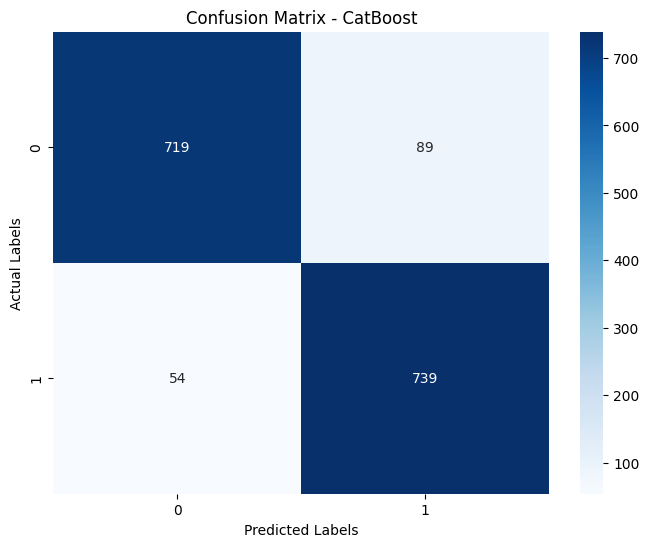

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CatBoost')
plt.show()

# Cross validation

# Tables